<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train (1).csv')


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]
cat_cols_origin=cat_cols
feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.iloc[np.random.randint(0, data.shape[0], 10)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5175,60,93.25,5774.55,Male,1,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
4957,66,110.85,7491.75,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,1
4639,41,24.85,962.25,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
1090,36,25.10,930.95,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
4922,28,20.25,535.35,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
354,4,19.40,93.4,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2719,45,85.70,3778.1,Female,1,No,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),0
1775,69,43.95,2960.1,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),0
1066,50,84.15,4164.4,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
3538,71,104.65,7288.4,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),0


In [ ]:
data = data.replace(" ", np.nan)

data = data.dropna()

data.isna().mean()

data_origin=data

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Sex DISTRIBUTION
Male      2651
Female    2622
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2704
Yes    2569
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1597
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4754
No      519
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dty

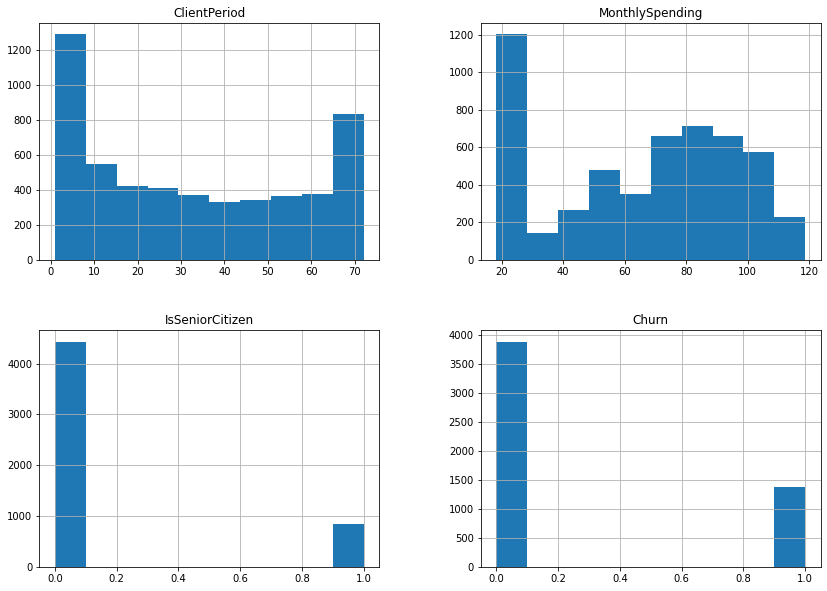

In [ ]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

Количество объектов первого класса превышает кодичество объектов второго класса больше чем в два раза.


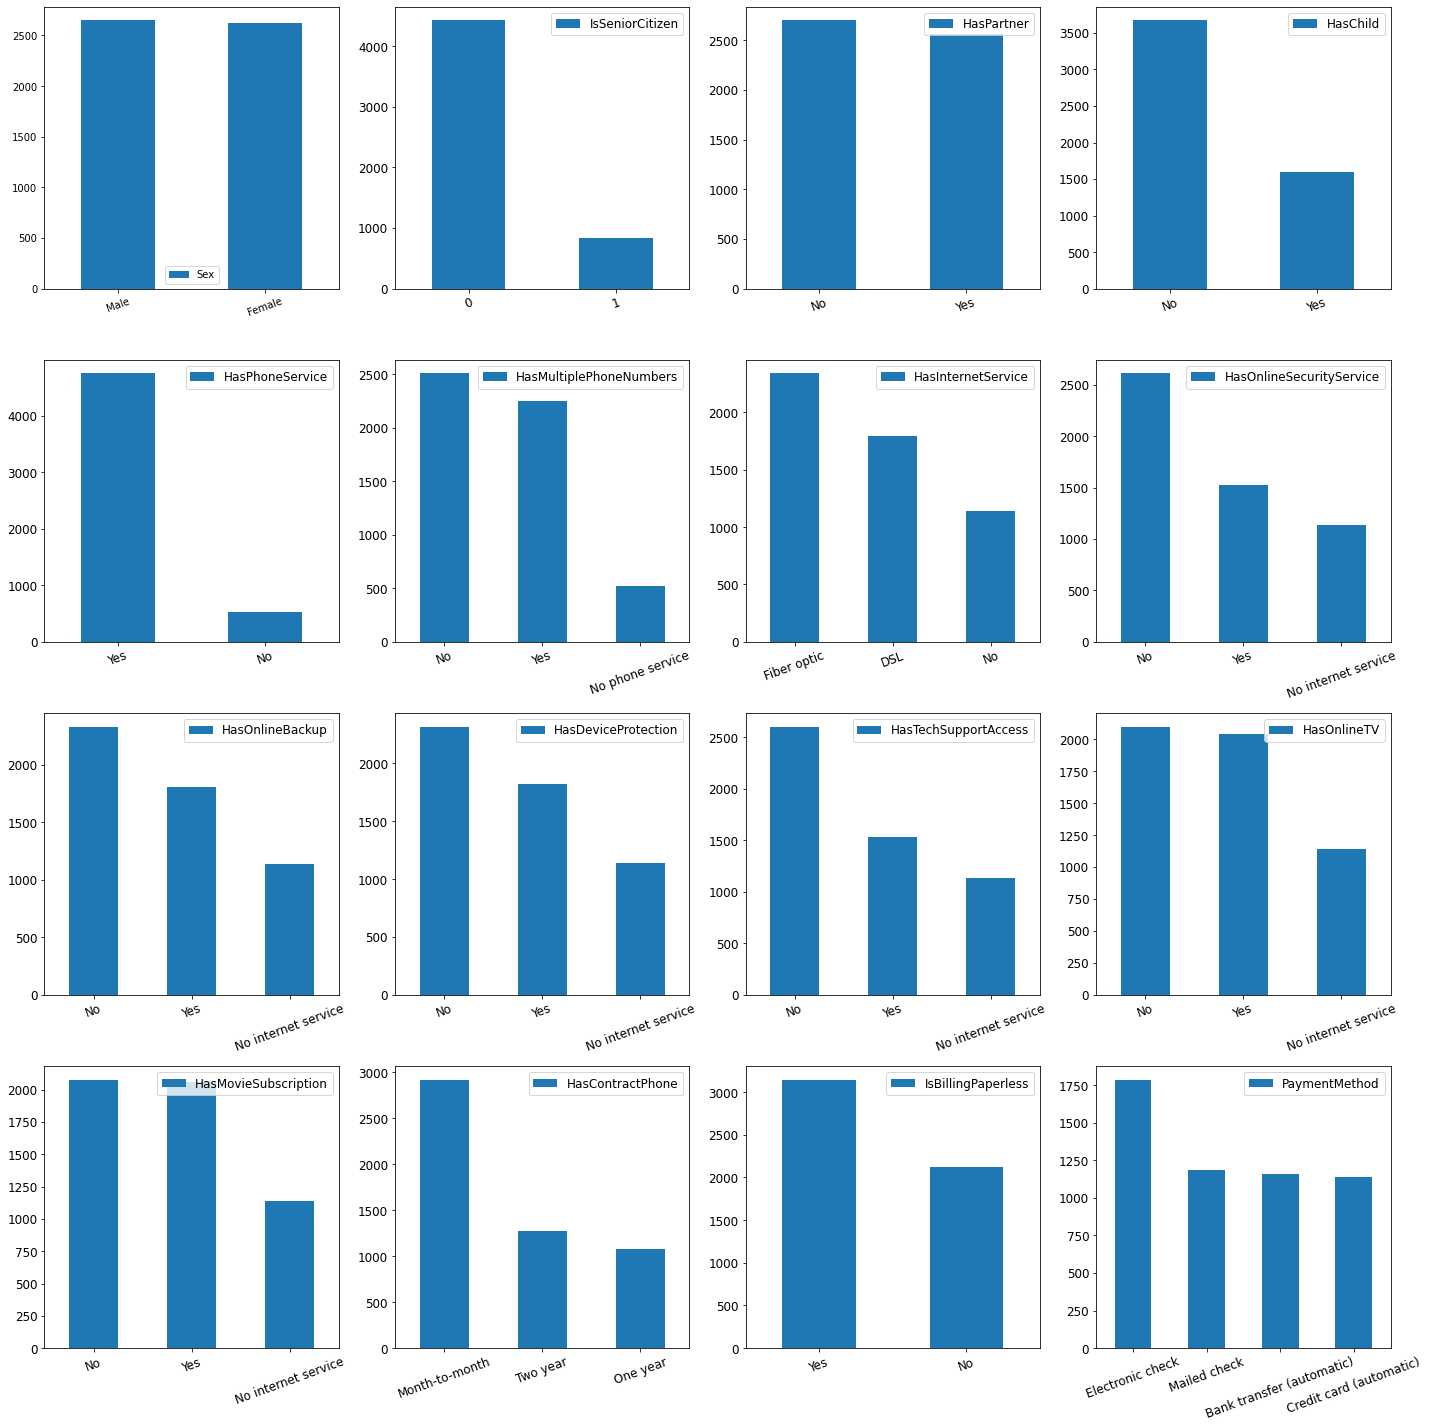

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in cat_cols:
  plt.subplot(4,4,i)
  data[col].value_counts().plot.bar(legend=True)
  plt.xticks(rotation=20)
  plt.rcParams['font.size'] = '12'
  plt.tight_layout() 
  i+=1




(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.get_dummies(data, columns=cat_cols)
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
pca = StandardScaler()
data = data.astype('float64') 
pca.fit(data[num_cols + cat_cols])
X = pca.transform(data[num_cols + cat_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2,random_state=42)

In [ ]:
CV_model = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                        cv=5, 
                        refit=True,
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)
CV_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
             scoring='roc_auc', verbose=10)

In [ ]:
print(CV_model.best_params_)
print(CV_model.best_score_)

{'C': 10}
0.8447287141690044


Сделал ещё  через модель LogisticRegressionCV




In [ ]:
С_values = [100, 10, 1, 0.1, 0.01, 0.001]
LR_model=LogisticRegressionCV(Cs=С_values, cv=5, 
                              refit=True, scoring='roc_auc')
LR_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], cv=5, scoring='roc_auc')

In [ ]:
print(LR_model.C_)
print(LR_model.scores_[1.0][:,1].mean())

[10.]
0.8447287313561105


Найдем лучший гиперпараметр C и лучший средний scoring


In [ ]:
LR_model_c_search=LogisticRegressionCV(cv=5, 
                              refit=True, scoring='roc_auc')
LR_model_c_search.fit(X_train, y_train)
LR_model_best_c=LogisticRegressionCV(Cs=LR_model_c_search.C_, cv=5, 
                              refit=True, scoring='roc_auc')
LR_model_best_c.fit(X_train, y_train)
print(LR_model_best_c.C_)
print(LR_model_best_c.scores_[1.0].mean())

[21.5443469]
0.8447243253710799


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

C=21.5443469 , scoring=0.8447243253710799

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
#!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
import catboost
categorical_indices = np.arange(3,19) 
X_origin =data_origin.iloc[:, :-1]
y=data.Churn
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin,  y_train,  y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
boosting_model = catboost.CatBoostClassifier(
                                             cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
train_auc 

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 59ms	remaining: 58.9s
1:	learn: 0.6683861	total: 68.7ms	remaining: 34.3s
2:	learn: 0.6574055	total: 76.4ms	remaining: 25.4s
3:	learn: 0.6459140	total: 89ms	remaining: 22.1s
4:	learn: 0.6353605	total: 98.5ms	remaining: 19.6s
5:	learn: 0.6261610	total: 106ms	remaining: 17.6s
6:	learn: 0.6167841	total: 115ms	remaining: 16.3s
7:	learn: 0.6080311	total: 124ms	remaining: 15.3s
8:	learn: 0.5997483	total: 132ms	remaining: 14.6s
9:	learn: 0.5918432	total: 142ms	remaining: 14s
10:	learn: 0.5839242	total: 151ms	remaining: 13.6s
11:	learn: 0.5766678	total: 160ms	remaining: 13.1s
12:	learn: 0.5701751	total: 165ms	remaining: 12.6s
13:	learn: 0.5631203	total: 176ms	remaining: 12.4s
14:	learn: 0.5566815	total: 185ms	remaining: 12.1s
15:	learn: 0.5507060	total: 194ms	remaining: 11.9s
16:	learn: 0.5449043	total: 213ms	remaining: 12.3s
17:	learn: 0.5390888	total: 222ms	remaining: 12.1s
18:	learn: 0.5338561	total: 232ms	remaining: 12s
19:	learn: 0.5

0.8934524745969756

In [ ]:
CV_model = GridSearchCV(estimator=catboost.CatBoostClassifier(
                                             cat_features=categorical_indices) , 
                      param_grid={'learning_rate':[0.02,0.05,0.1,0.07],'num_trees':[150,200,400,600]},
                      scoring='roc_auc',
                      cv=5,
                      n_jobs=-1, 
                      verbose=10)
CV_model.fit(X_train_origin, y_train)
means = CV_model.cv_results_['mean_test_score']
error = CV_model.cv_results_['std_test_score']
CV_model.best_score_,CV_model.best_params_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
0:	learn: 0.6755497	total: 4.18ms	remaining: 623ms
1:	learn: 0.6588521	total: 7.79ms	remaining: 576ms
2:	learn: 0.6434135	total: 11.3ms	remaining: 554ms
3:	learn: 0.6290541	total: 14.9ms	remaining: 542ms
4:	learn: 0.6164281	total: 18.3ms	remaining: 530ms
5:	learn: 0.6038403	total: 22ms	remaining: 528ms
6:	learn: 0.5926804	total: 26.8ms	remaining: 548ms
7:	learn: 0.5821404	total: 30.3ms	remaining: 537ms
8:	learn: 0.5727621	total: 33.8ms	remaining: 530ms
9:	learn: 0.5637952	total: 37.1ms	remaining: 519ms
10:	learn: 0.5558103	total: 40.6ms	remaining: 513ms
11:	learn: 0.5486578	total: 43.7ms	remaining: 503ms
12:	learn: 0.5415042	total: 46.9ms	remaining: 494ms
13:	learn: 0.5346665	total: 50.1ms	remaining: 487ms
14:	learn: 0.5286404	total: 53.3ms	remaining: 480ms
15:	learn: 0.5228549	total: 56.5ms	remaining: 473ms
16:	learn: 0.5176495	total: 59.7ms	remaining: 467ms
17:	learn: 0.5126549	total: 63.1ms	remaining: 462ms
18:	learn: 0.50

(0.8464547275153945, {'learning_rate': 0.05, 'num_trees': 150})

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
roc_auc_score(y_train, y_train_predicted),boosting_model.learning_rate_, boosting_model.tree_count_

(0.8934524745969756, 0.019047999754548073, 1000)

score: 0.8934524745969756, lr=0.019047999754548073 , tree_count=1000


# Предсказания

In [ ]:
best_model = boosting_model

In [44]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = boosting_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',index=False)


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.